In [15]:
import os

In [18]:
assert os.path.isfile('hn_data/hn.csv'), "HN Data missing, check the README"

---

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Plotting
import pygal
from pygal import style
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import calendar

from utils import render, read_hn_file

%matplotlib inline

In [2]:
df = read_hn_file('hn_data/hn.csv')

/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [3]:
df.head()

,Title,Post Type,Author,Created At,URL,Points,Number of Comments,Created At Eastern,Rounded Month,Day of Week,Hour of the Day
Object ID,,,,,,,,,,,
1,Y Combinator,story,pg,2006-10-09 18:21:51,http://ycombinator.com,61,18.0,2006-10-09 14:21:51-04:00,2006-10,Monday,14
2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,http://www.paulgraham.com/mit.html,16,1.0,2006-10-09 14:30:28-04:00,2006-10,Monday,14
3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,http://www.foundersatwork.com/stevewozniak.html,7,1.0,2006-10-09 14:40:33-04:00,2006-10,Monday,14
4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,http://avc.blogs.com/a_vc/2006/10/the_nyc_deve...,5,1.0,2006-10-09 14:47:42-04:00,2006-10,Monday,14
5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,http://www.techcrunch.com/2006/10/09/google-yo...,7,1.0,2006-10-09 14:51:04-04:00,2006-10,Monday,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822673 entries, 1 to 21416156
Data columns (total 11 columns):
Title                 object
Post Type             category
Author                object
Created At            datetime64[ns]
URL                   object
Points                int64
Number of Comments    float64
Created At Eastern    datetime64[ns, US/Eastern]
Rounded Month         period[M]
Day of Week           object
Hour of the Day       int64
dtypes: category(1), datetime64[ns, US/Eastern](1), datetime64[ns](1), float64(1), int64(2), object(4), period[M](1)
memory usage: 239.6+ MB


---

## Analysis

### Distribution of posts by day of the week

It's interesting to see what days were used to post different types of stories:

In [5]:
subset = df.loc[df['Created At Eastern'] > '2019']

In [6]:
results = df['Title'].groupby([df['Day of Week'], df['Post Type']]).count().unstack()

In [7]:
results = subset['Title'].groupby([subset['Day of Week'], subset['Post Type']]).count().unstack()

In [8]:
# Order by day of week
results = results.loc[list(calendar.day_name)]

In [9]:
results

Post Type,ask_hn,poll,story,show_hn
Day of Week,,,,
Monday,1482.0,4.0,36610.0,1544.0
Tuesday,1637.0,4.0,39612.0,1558.0
Wednesday,1559.0,2.0,39823.0,1595.0
Thursday,1503.0,4.0,39283.0,1419.0
Friday,1439.0,NaN,33802.0,1189.0
Saturday,954.0,4.0,21429.0,816.0
Sunday,1103.0,1.0,21733.0,875.0


Here's a complete summary; it's perfectly clear that Saturdays and Sundays are the days were less posts are created, with Tuesday being the most popular day:

In [11]:
chart = pygal.StackedBar(explicit_size=900, style=style.BlueStyle)

chart.x_labels = results.index.values
chart.add('Stories', results['story'].values)
chart.add('Ask HN', results['ask_hn'].values)
chart.add('Show HN', results['show_hn'].values)
chart.add('Poll', results['poll'].values)

render(chart)

In [13]:
chart.render_to_png('img/posts_per_day_of_week.png')

### High Volume, high competition vs low volume low competition

Number of submissions per day and hour:

In [14]:
total_posts = df['Title'].groupby([df['Day of Week'], df['Hour of the Day']]).count().unstack()

In [20]:
total_posts.index = total_posts.reset_index()['Day of Week'].str[:3]

In [21]:
total_posts = total_posts.loc[[calendar.day_abbr[i] for i in range(7)]]

In [22]:
total_posts

Hour of the Day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,10307,10156,11464,11677,12530,13210,14252,17030,21184,26617,...,28389,26185,25006,22277,18255,15304,13982,13227,12582,12471
Tue,12104,11830,12498,13285,13910,14510,15774,18561,22914,29287,...,30663,27551,26246,22923,18899,15781,14206,13201,12998,12525
Wed,12271,12135,12332,12931,14019,14377,16052,17968,22725,28688,...,29982,27185,25912,22980,18617,16047,13985,13238,12565,12196
Thu,11802,11590,12260,12758,13566,14105,15479,18024,22061,27554,...,29431,26510,25381,22376,18039,15644,13755,12630,12015,11672
Fri,11040,11235,11634,11925,12924,13490,14272,16247,20273,24628,...,25149,22882,21185,18399,15037,12617,10705,9273,8459,8314
Sat,7772,7503,7441,7279,7406,7610,8352,8970,9974,11533,...,13789,13009,12130,11158,10448,8953,8202,7878,7440,7098
Sun,6832,6635,6106,6536,6696,7083,7759,8572,9561,10917,...,14469,14119,13437,12921,11248,10453,10090,10130,10352,10136


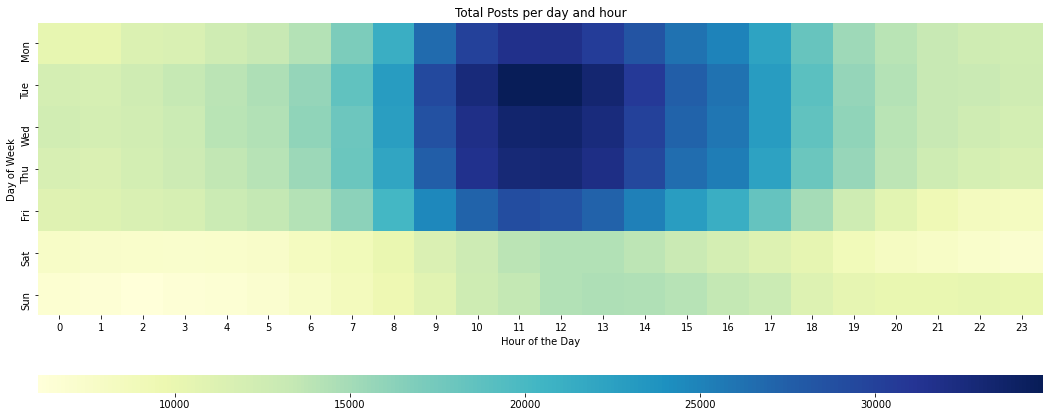

In [23]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
fig, (ax, cbar_ax) = plt.subplots(2, figsize=(18, 7), gridspec_kw=grid_kws)
ax.set_title('Total Posts per day and hour')
sns.heatmap(
    total_posts, square=True,
    cmap="YlGnBu",
    ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})


Total points per day and hour:

In [27]:
total_points = df['Points'].groupby([df['Day of Week'], df['Hour of the Day']]).sum().unstack()

In [28]:
total_points.index = total_points.reset_index()['Day of Week'].str[:3]

In [29]:
total_points = total_points.loc[[calendar.day_abbr[i] for i in range(7)]]

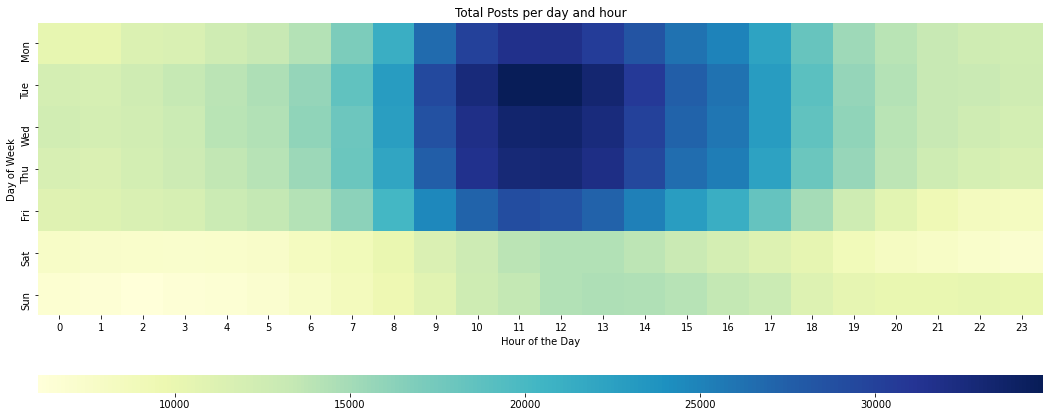

In [30]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
fig, (ax, cbar_ax) = plt.subplots(2, figsize=(18, 7), gridspec_kw=grid_kws)
ax.set_title('Total Posts per day and hour')
sns.heatmap(
    total_posts, square=True,
    cmap="YlGnBu",
    ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})


Average points per post per day and hour:

In [32]:
avg_points_post = total_points/total_posts

In [33]:
avg_points_post

Hour of the Day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,14.237800,13.378102,12.230897,12.345637,12.921947,12.649659,13.319113,13.620258,13.976397,13.323553,...,13.636056,13.593011,12.747061,12.101091,12.663928,13.754835,12.849950,13.559084,13.663964,12.419373
Tue,11.991490,11.205325,10.957993,11.946782,11.680446,11.406616,12.658108,13.882442,13.751287,12.807867,...,12.332192,12.137999,12.276842,12.284125,12.709826,12.396173,12.808250,13.204530,12.759963,12.278164
Wed,12.182300,11.552781,12.176776,11.249787,10.903060,11.705502,12.339459,14.222729,13.999912,12.778618,...,12.884697,12.709068,12.650085,12.277241,12.709943,12.677011,12.837683,12.781689,12.826900,13.478026
Thu,11.910608,11.858154,10.442659,10.859226,10.771782,12.010209,13.053621,13.927874,14.750193,13.463889,...,12.813802,12.907318,12.864860,12.568958,12.822995,12.619215,13.083606,12.395487,12.764877,12.957848
Fri,12.727083,12.060080,11.441035,10.789266,11.141752,12.642402,13.177340,14.388441,14.840675,13.630502,...,13.385701,13.020933,12.176068,12.573346,11.772495,12.539827,13.162915,13.394047,12.614493,12.922781
Sat,13.088137,12.832600,12.719258,12.775106,12.535377,11.785414,14.969828,15.770792,17.094345,17.053932,...,16.433534,15.541164,16.324897,15.384567,15.533308,16.719870,16.515606,16.381569,16.872581,15.831220
Sun,16.179011,15.198945,15.615952,15.587974,15.800926,15.227728,16.401985,18.083878,17.844263,16.869286,...,16.669293,16.307600,17.118702,16.544463,16.597795,16.728021,16.340139,17.580553,16.044049,15.322021


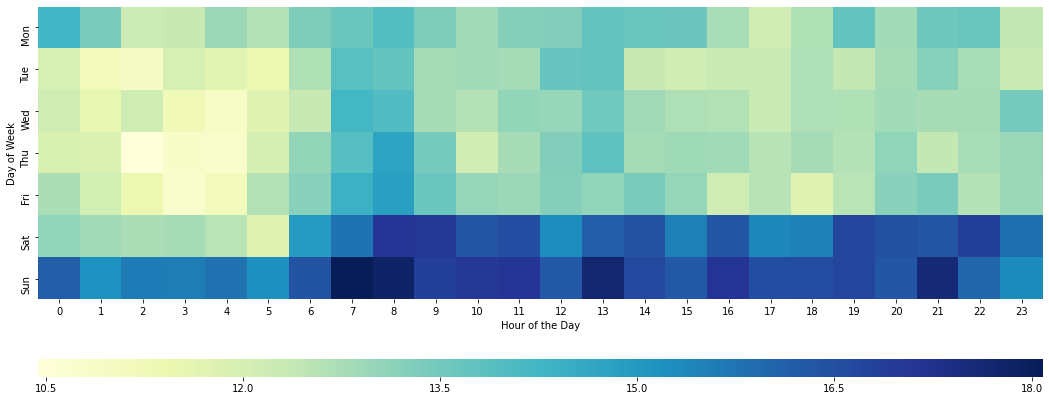

In [34]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
fig, (ax, cbar_ax) = plt.subplots(2, figsize=(18, 7), gridspec_kw=grid_kws)
sns.heatmap(
    avg_points_post, square=True,
    cmap="YlGnBu",
    ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})


---

### Percentile analysis

Percentile 75% for points per day and hour:

In [36]:
perc_75 = df['Points'].groupby(
    [df['Day of Week'], df['Hour of the Day']]).agg(lambda x: np.percentile(x, 75)).unstack()

In [37]:
perc_75.index = perc_75.reset_index()['Day of Week'].str[:3]

In [38]:
perc_75 = perc_75.loc[[calendar.day_abbr[i] for i in range(7)]]

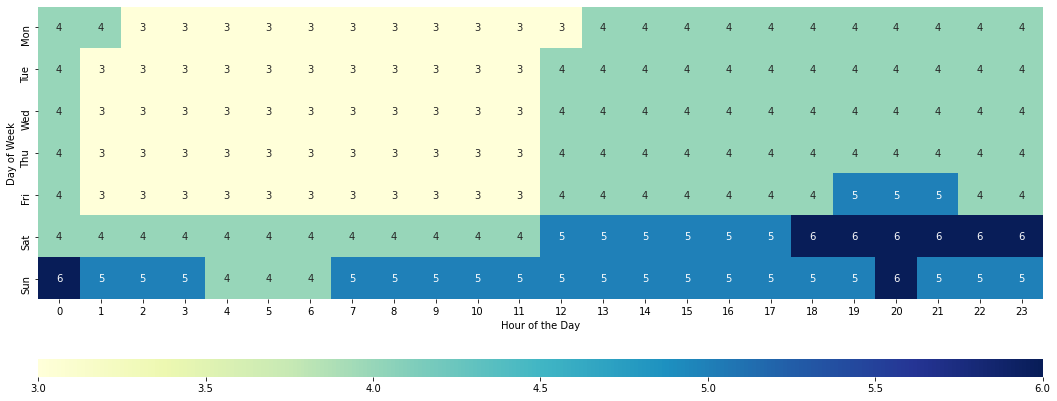

In [39]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
fig, (ax, cbar_ax) = plt.subplots(2, figsize=(18, 7), gridspec_kw=grid_kws)
sns.heatmap(
    perc_75,square=True, annot=True,
    cmap="YlGnBu",
    ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})


---

Percentile to of 10 points:

In [41]:
POINTS = 10

In [43]:
points_10_perc = df['Points'].groupby([df['Day of Week'], df['Hour of the Day']]).agg(
    lambda arr: stats.percentileofscore(arr, POINTS)).unstack()

In [44]:
points_10_perc.index = points_10_perc.reset_index()['Day of Week'].str[:3]

In [45]:
points_10_perc = points_10_perc.loc[[calendar.day_abbr[i] for i in range(7)]]

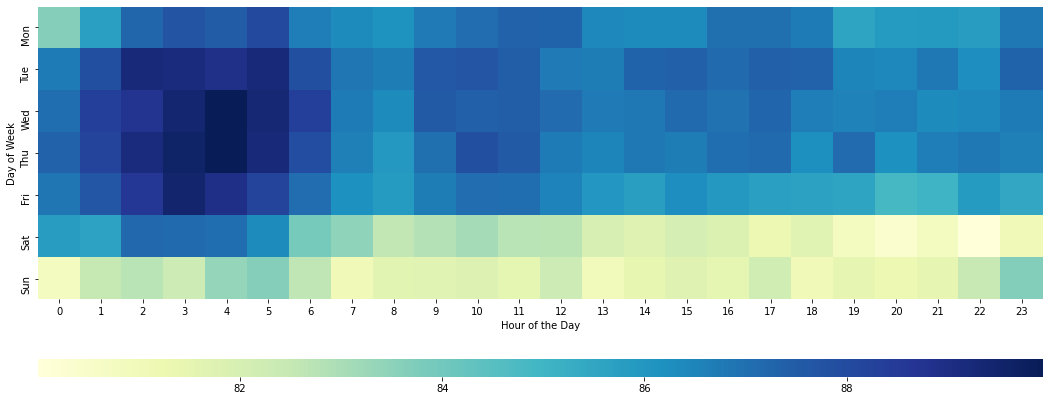

In [46]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
fig, (ax, cbar_ax) = plt.subplots(2, figsize=(18, 7), gridspec_kw=grid_kws)
sns.heatmap(
    points_10_perc,square=True,
    cmap="YlGnBu",
    ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})


---

### Number of submissions per link:

In [51]:
df_url_clean = df.dropna(subset=['URL'])

In [60]:
submissions = df['Title'].groupby(df['URL']).count()

In [61]:
submissions.describe()

count    2.406650e+06
mean     1.100089e+00
std      6.443244e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.040000e+02
Name: Title, dtype: float64

In [62]:
submissions.value_counts().head()

1    2236092
2     126931
3      25762
4       8021
5       3399
Name: Title, dtype: int64

Percentage of post submitted 2 or more times:

In [63]:
(submissions >= 2).sum() / submissions.shape[0] * 100

6.97471589138429